In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Checking for missing values

In [3]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values

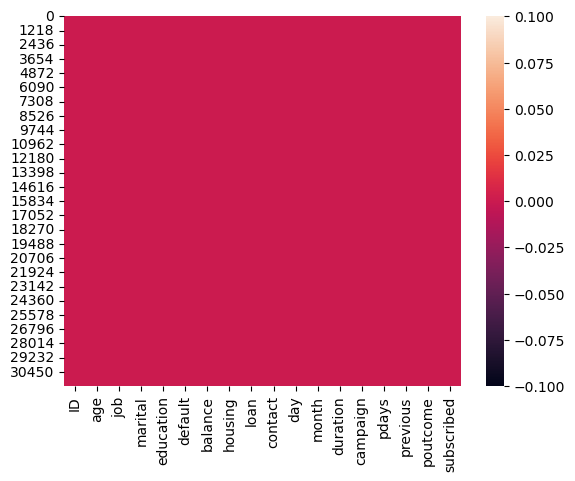

In [4]:
sns.heatmap(df.isnull())
plt.show()

# Exploratory Data Analysis

In [5]:
#delete column ID as it is not useful
df.drop('ID' , axis=1 , inplace=True)
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no


In [6]:
categorical = []
numerical =[]
for i in df.columns :
    if df[i].dtypes == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

In [7]:
print('columns with categorical data are :\n',categorical)
print('\n')
print('columns with numerical data are :\n',numerical)

columns with categorical data are :
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


columns with numerical data are :
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [8]:
#now let us check unique values of every type
for i in numerical :
    print(df[i].value_counts())
    print('\n')

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64


1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8   

All numerical columns contains desecrete data except balance

In [9]:
for i in categorical :
    print(df[i].value_counts())
    print('\n')

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


yes    17584
no     14063
Name: housing, dtype: int64


no     26516
yes     5131
Name: loan, dtype: int64


cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int

In [10]:
# in column poutcome we see values like other which doesn't make any sense or giving any information so we will delete it
ind = np.where(df['poutcome'] == 'other')
df.drop(df.index[ind] ,axis =0 , inplace= True)

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


As we see when we removed the other variable in poutcome column , shape of data reduced from 31647 to 30359

In [12]:
#from above we notice that duration contains data in seconds so we will convert it to minutes for better insight
df['duration'] = df['duration'].apply(lambda x :x/60).round(2)
df['duration'].value_counts()

1.50     134
1.73     126
2.32     123
1.27     123
2.07     122
        ... 
33.00      1
22.95      1
18.70      1
15.08      1
32.88      1
Name: duration, Length: 1441, dtype: int64

In [13]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.73,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.52,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.00,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.45,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.33,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.93,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.30,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.62,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.37,7,337,12,failure,no


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,30359.000000,30359.000000,30359.000000,30359.000000,30359.000000,30359.000000,30359.000000
mean,40.992062,1358.188379,15.882802,4.303781,2.778682,31.528245,0.426068
std,10.591812,3006.681719,8.337551,4.291902,3.156188,89.700159,1.502571
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,1.730000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,3.000000,2.000000,-1.000000,0.000000
75%,49.000000,1421.000000,21.000000,5.300000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,81.970000,63.000000,871.000000,38.000000


The summury of Data shows :

mean in all columns is greater than 50%(median) which mean data is skewed to right

in all columns there is a difference between 75% quantity value and max value which says we need to remove outliers

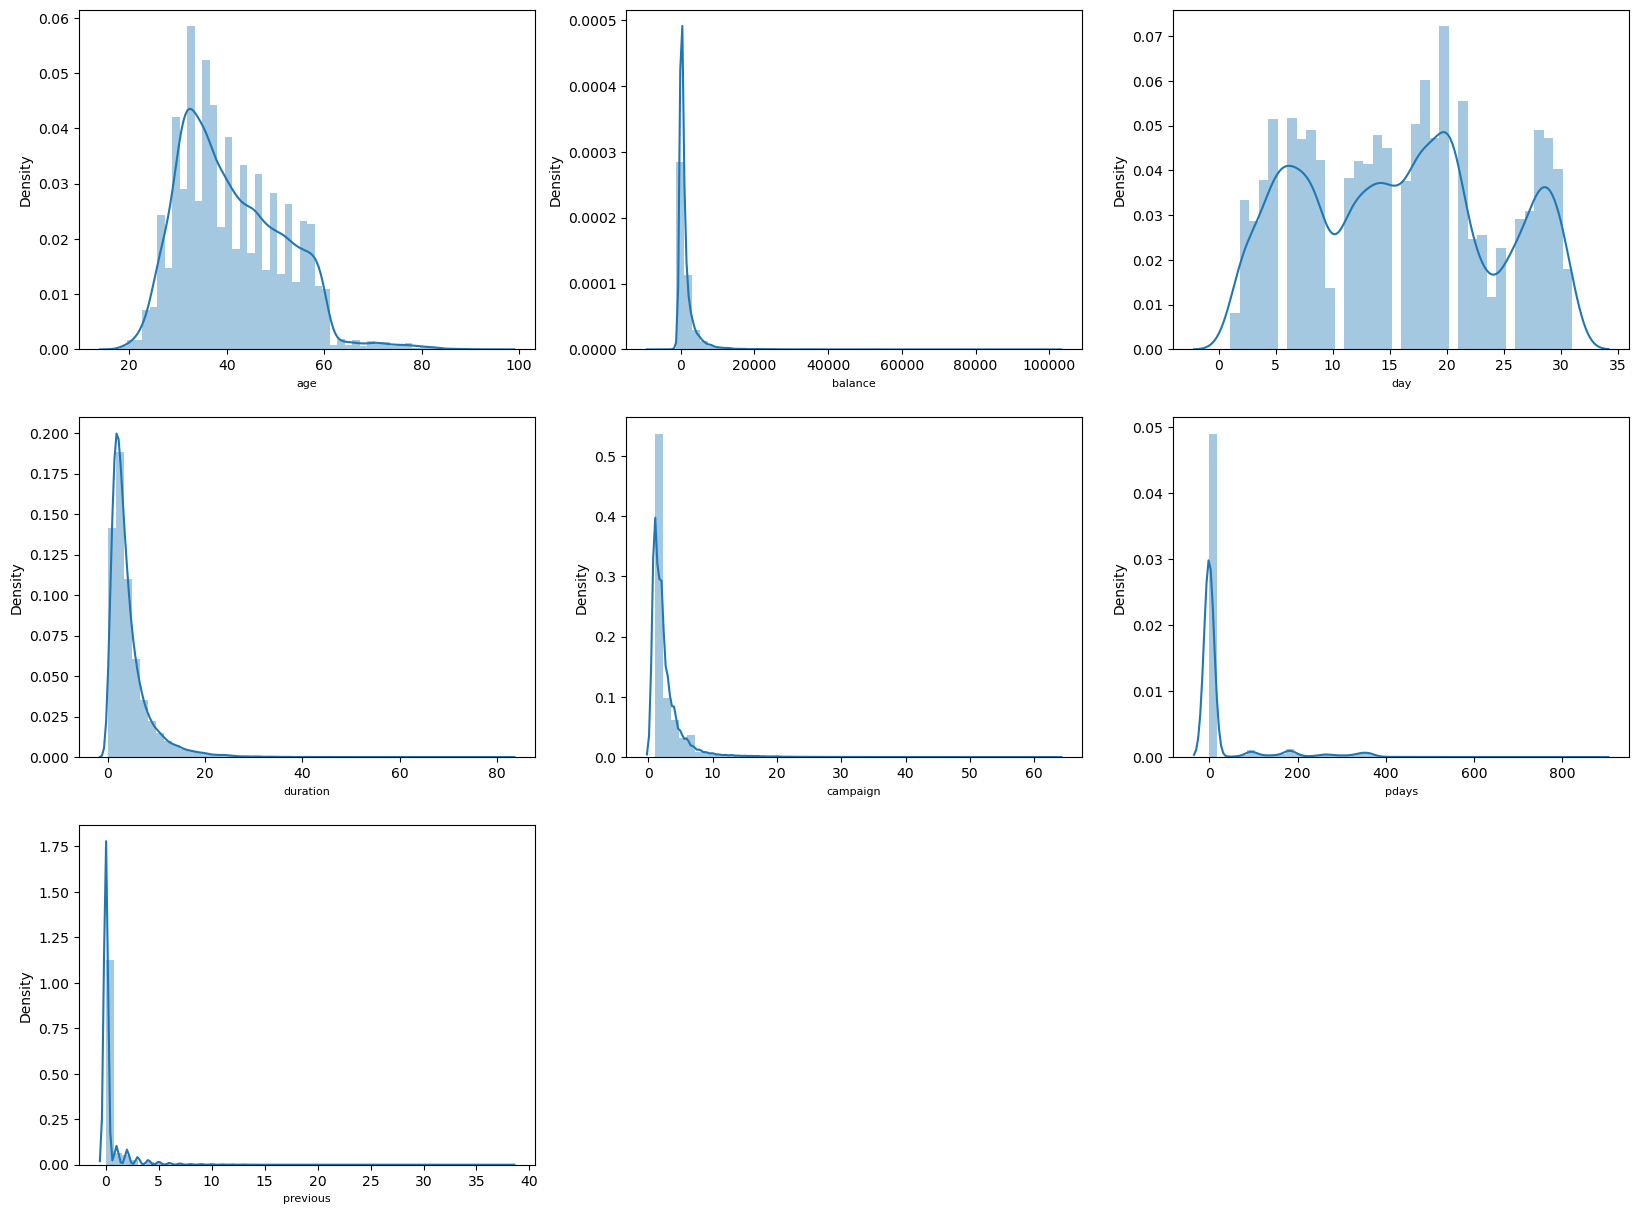

In [15]:
plt.figure(figsize=(20,15))
plotnum=1
for i in numerical:
    if plotnum <=8 :
        ax = plt.subplot(3,3,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i ,fontsize=8)
    plotnum +=1
plt.show()    

# Data Visualization

no     26861
yes     3498
Name: subscribed, dtype: int64


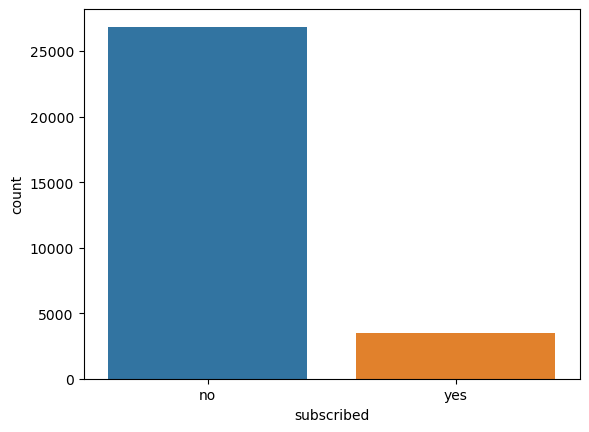

In [16]:
print(df['subscribed'].value_counts())
sns.countplot(x = 'subscribed' , data = df)
plt.show()

we see that only 3498 customers subscribed while 26861 did not which mean the bank's marketing is not attractive

blue-collar      6569
management       6366
technician       5095
admin.           3453
services         2782
retired          1509
self-employed    1076
entrepreneur      977
unemployed        883
housemaid         859
student           586
unknown           204
Name: job, dtype: int64


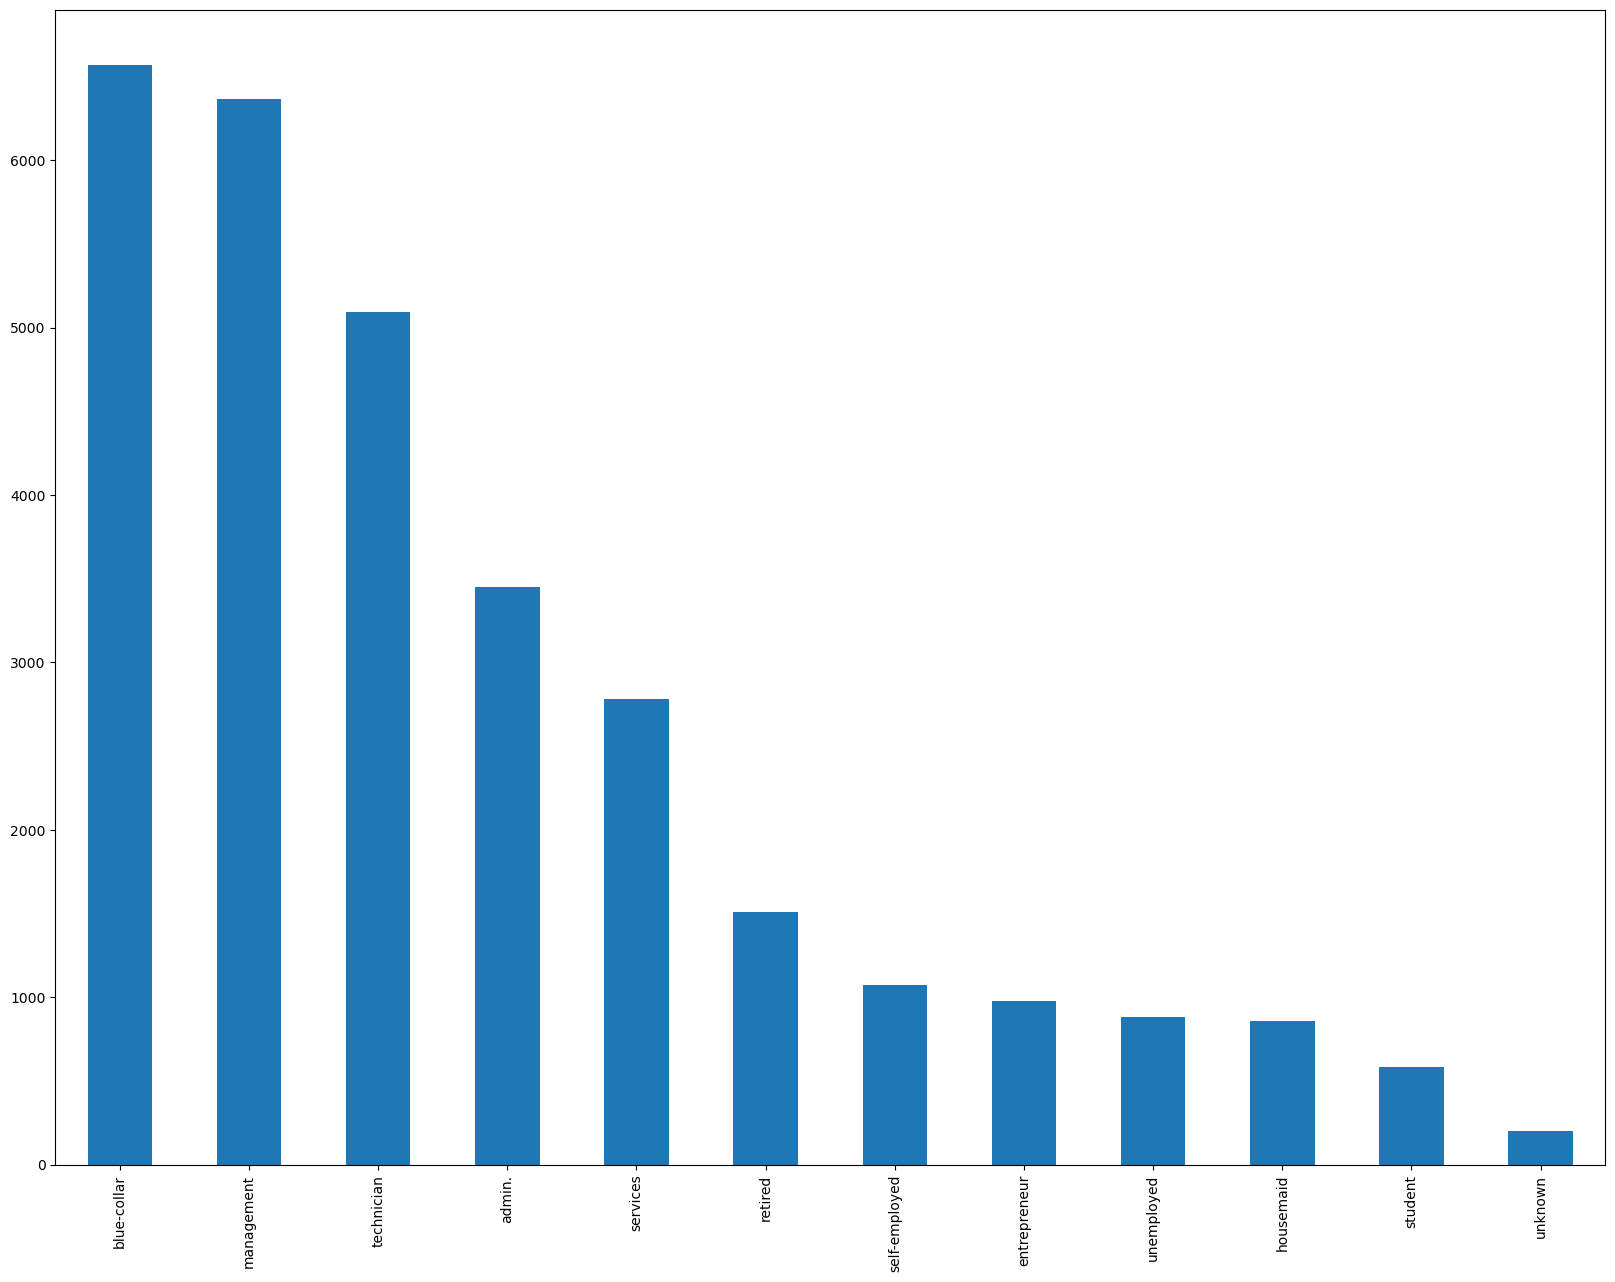

In [17]:
print(df['job'].value_counts())
plt.figure(figsize=(20,15))
df['job'].value_counts().plot(kind = 'bar')
plt.show()

it seems that the most clients are blue-collar job while student are the least

subscribed       no  yes
job                     
admin.         3030  423
blue-collar    6103  466
entrepreneur    895   82
housemaid       783   76
management     5505  861
retired        1171  338
self-employed   947  129
services       2536  246
student         418  168
technician     4535  560
unemployed      759  124
unknown         179   25


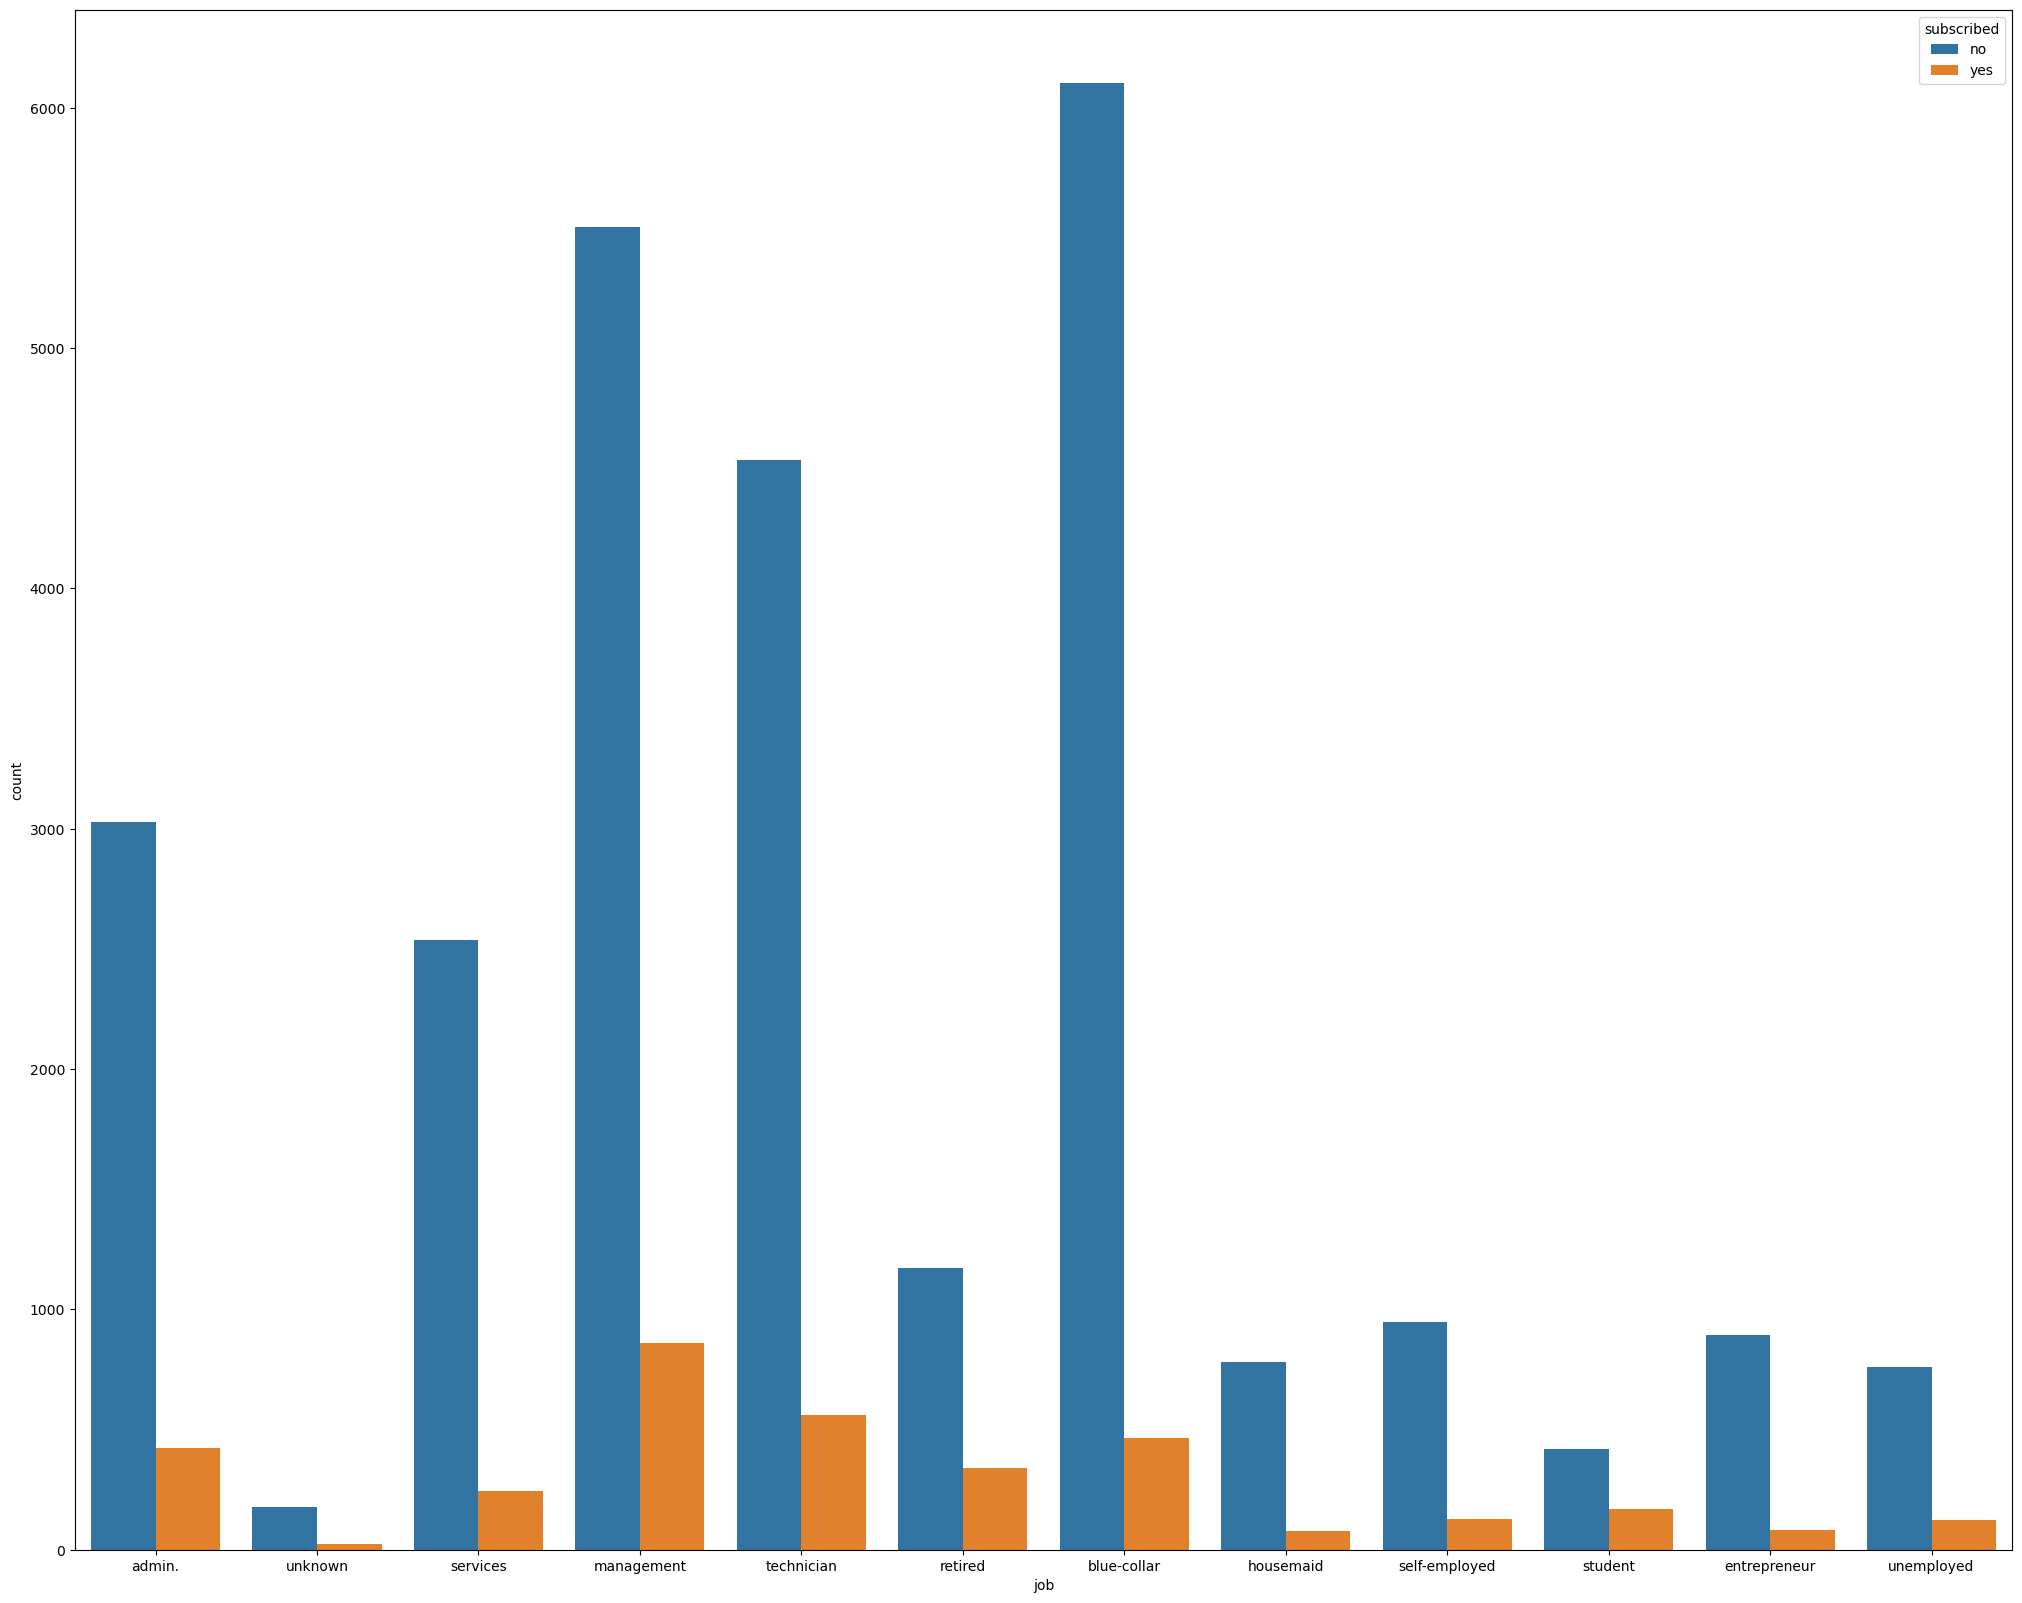

In [18]:
print(pd.crosstab(df['job'] , df['subscribed']))
plt.figure(figsize=(25,20))
sns.countplot(x= df['job'] , hue = df['subscribed'])
plt.show()

blue-collar clients seems to not intend to subsribe in terms deposts

clients who are managers in the field make deposts more than any clients

married     18404
single       8486
divorced     3469
Name: marital, dtype: int64


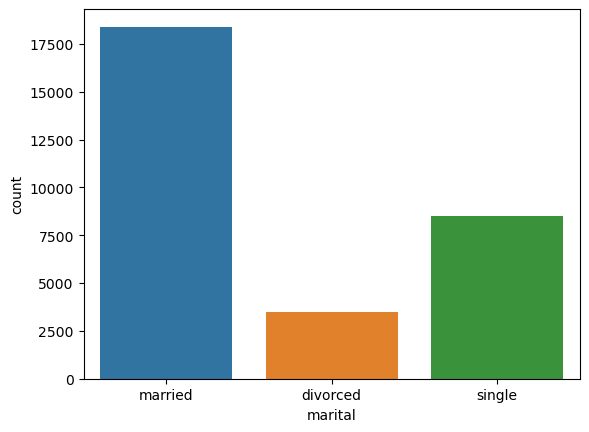

In [19]:
print(df['marital'].value_counts())
sns.countplot(x = 'marital' , data = df)
plt.show()

The majority of clients are married while the diforced are the less

subscribed     no   yes
marital                
divorced     3055   414
married     16599  1805
single       7207  1279


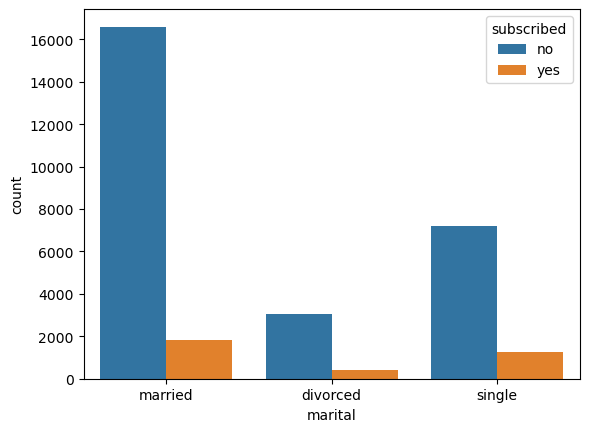

In [20]:
print(pd.crosstab(df['marital'] , df['subscribed']))
sns.countplot(x= df['marital'] , hue = df['subscribed'])
plt.show()

Most of clients who are married did not make a deposit term while most of single clients made it

yes    16761
no     13598
Name: housing, dtype: int64


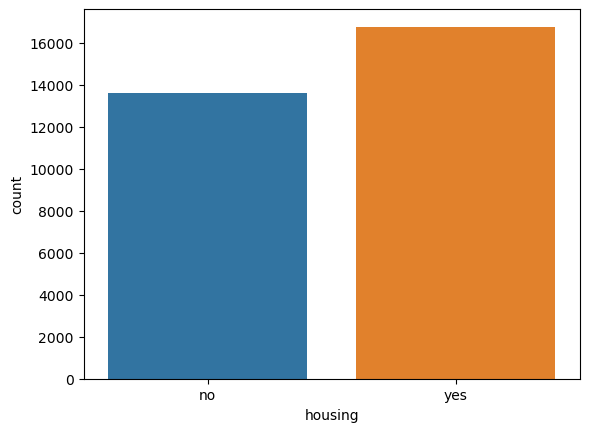

In [21]:
print(df['housing'].value_counts())
sns.countplot(x = 'housing' , data = df)
plt.show()

Most of clients have housing loans but there is no big difference between who have and who don't

subscribed     no   yes
housing                
no          11376  2222
yes         15485  1276


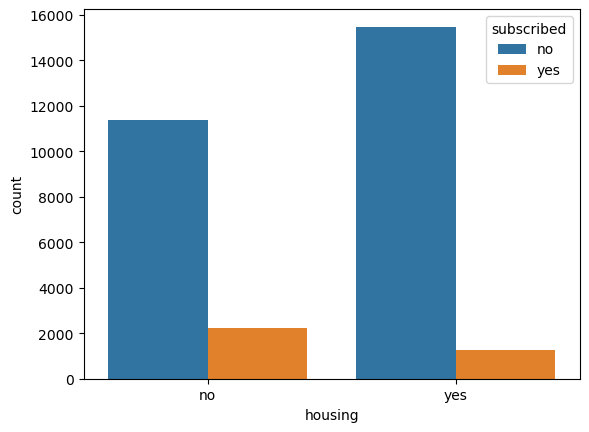

In [22]:
print(pd.crosstab(df['housing'] , df['subscribed']))
sns.countplot(x= df['housing'] , hue = df['subscribed'])
plt.show()

most of clients wh have housing loans did not subscribe term deposits

no     25415
yes     4944
Name: loan, dtype: int64


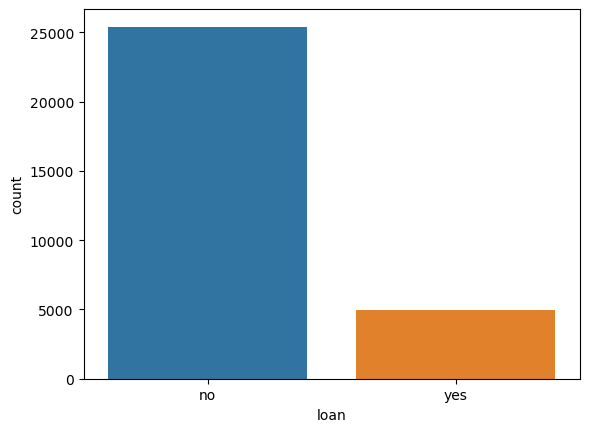

In [23]:
print(df['loan'].value_counts())
sns.countplot(x = 'loan' , data = df)
plt.show()

subscribed     no   yes
loan                   
no          22239  3176
yes          4622   322


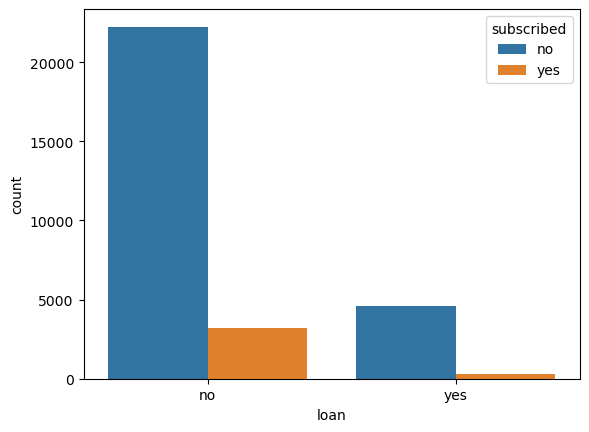

In [24]:
print(pd.crosstab(df['loan'] , df['subscribed']))
sns.countplot(x= df['loan'] , hue = df['subscribed'])
plt.show()

Clients who have no persnal loans don't have a subscription in terms deposit but still have the chance to make it

cellular     19274
unknown       9160
telephone     1925
Name: contact, dtype: int64


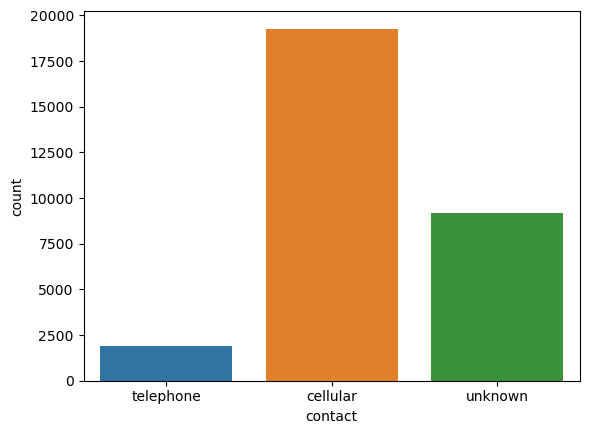

In [25]:
print(df['contact'].value_counts())
sns.countplot(x = 'contact' , data = df)
plt.show()

most of clients use celular to cmmunicate with bank while telephone is the less used at all

may    9259
jul    4810
aug    4271
jun    3692
nov    2631
apr    1878
feb    1661
jan     876
oct     467
sep     367
mar     311
dec     136
Name: month, dtype: int64


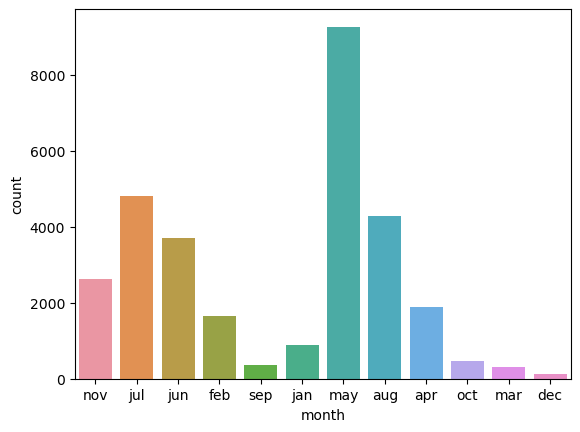

In [26]:
print(df['month'].value_counts())
sns.countplot(x = 'month' , data = df)
plt.show()

may is the highest month f recieving contact from clients

subscribed    no  yes
month                
apr         1515  363
aug         3778  493
dec           74   62
feb         1369  292
jan          787   89
jul         4388  422
jun         3330  362
mar          150  161
may         8647  612
nov         2372  259
oct          259  208
sep          192  175


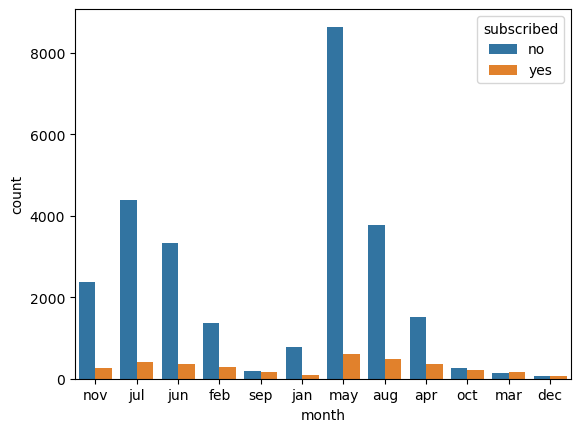

In [27]:
print(pd.crosstab(df['month'] , df['subscribed']))
sns.countplot(x= df['month'] , hue = df['subscribed'])
plt.show()

most clients who subscribed in term deposits was in may while aug is the second

dec is the less month of work

unknown    25929
failure     3362
success     1068
Name: poutcome, dtype: int64


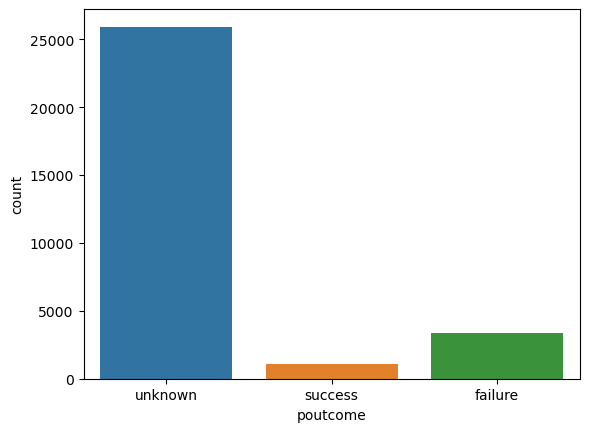

In [28]:
print(df['poutcome'].value_counts())
sns.countplot(x = 'poutcome' , data = df)
plt.show()

most of the outcome of previous campaigns of the bank had failed

subscribed     no   yes
education              
primary      4238   397
secondary   13937  1606
tertiary     7580  1328
unknown      1106   167


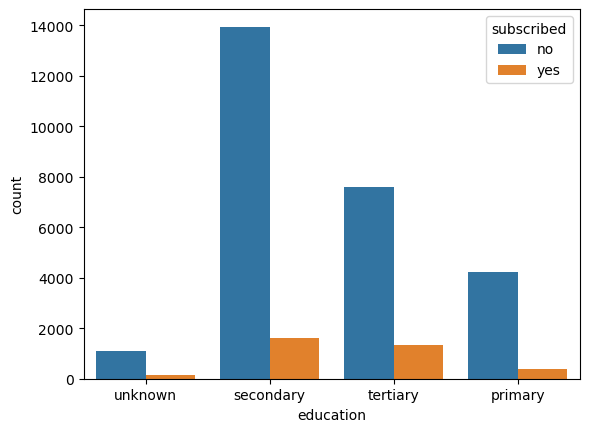

In [29]:
print(pd.crosstab(df['education'] , df['subscribed']))
sns.countplot(x= df['education'] , hue = df['subscribed'])
plt.show()

Higher education clients intend to subscribe more than any education levels

subscribed     no   yes
default                
no          26329  3459
yes           532    39


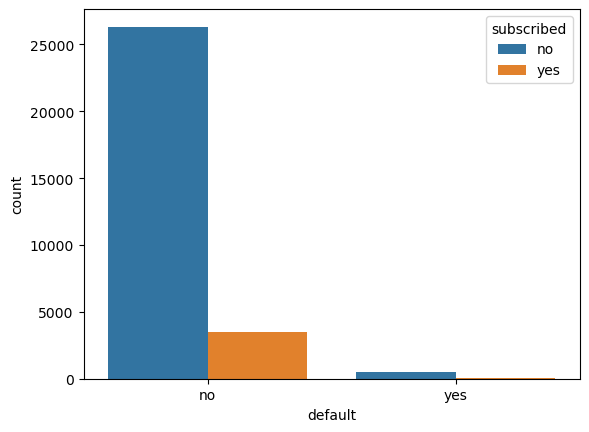

In [30]:
print(pd.crosstab(df['default'] , df['subscribed']))
sns.countplot(x= df['default'] , hue = df['subscribed'])
plt.show()

clients with no default history intend to subscribe more than who have

subscribed     no   yes
campaign               
1           10087  1686
2            7502   937
3            3288   388
4            2126   217
5            1096    90
6             806    67
7             461    32
8             321    21
9             213    14
10            170    11
11            111    11
12             98     2
13             88     5
14             65     3
15             58     3
16             52     2
17             46     6
18             37     0
19             30     0
20             36     1
21             19     0
22             18     0
23             13     0
24             12     1
25             17     0
26              9     0
27              8     0
28             14     0
29             12     0
30              6     0
31              9     0
32              5     1
33              5     0
34              5     0
35              3     0
36              1     0
37              2     0
38              3     0
39              1     0
41              

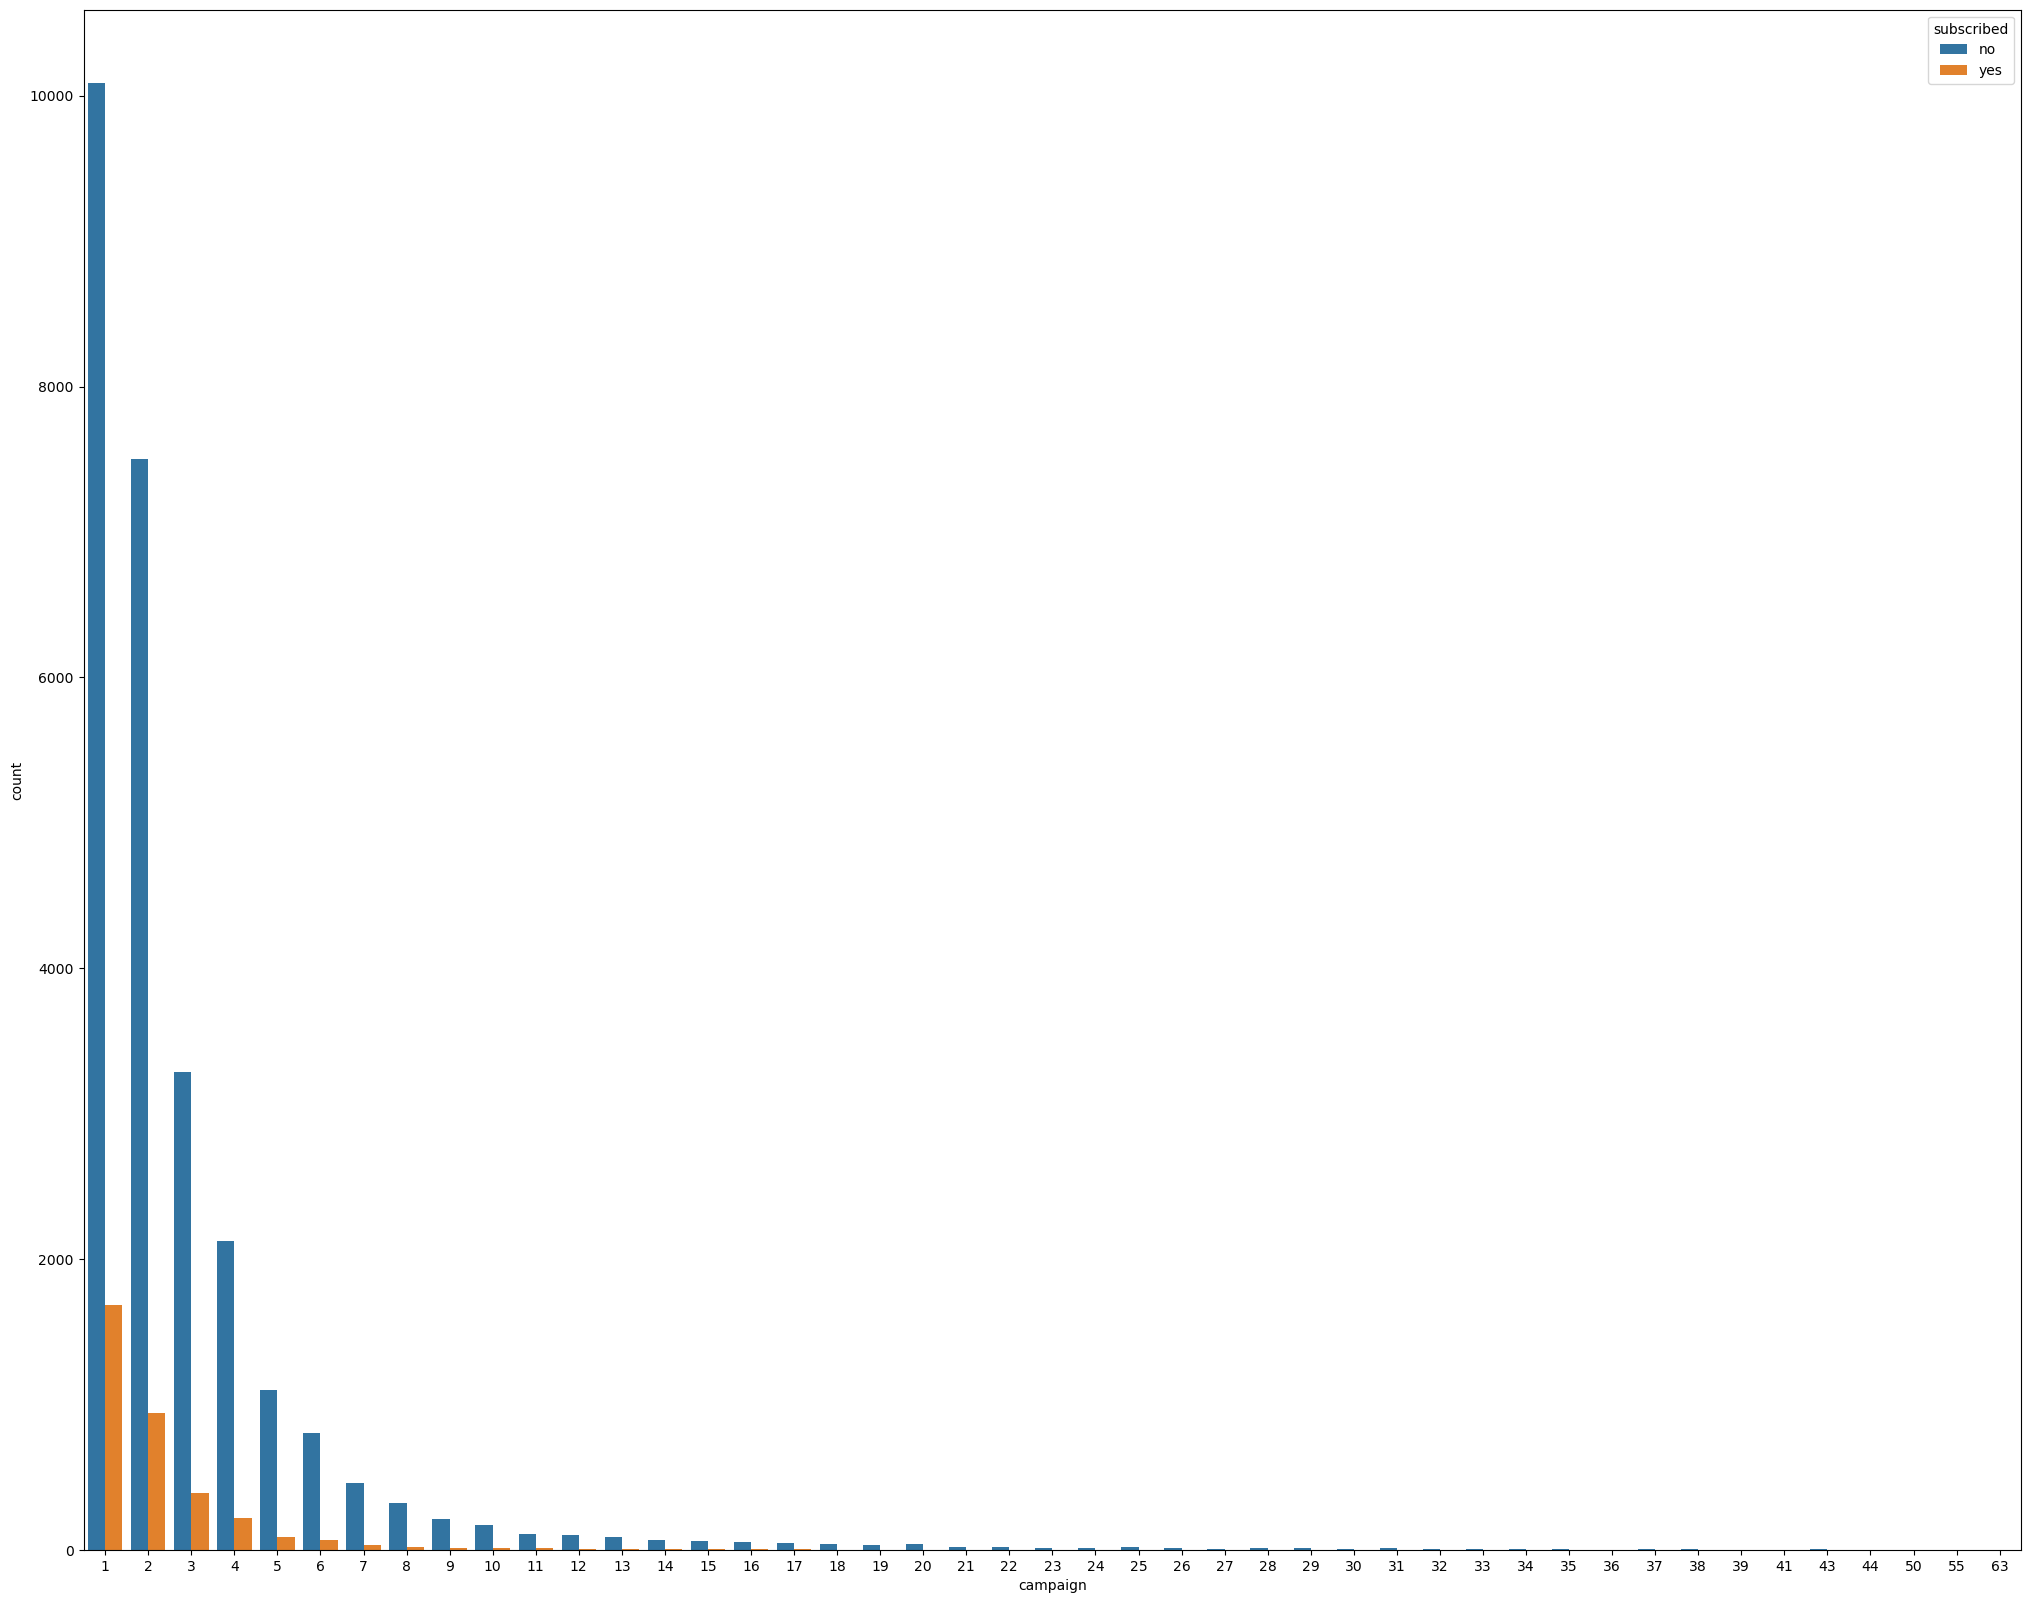

In [31]:
print(pd.crosstab(df['campaign'] , df['subscribed']))
plt.figure(figsize=(25,20))
sns.countplot(x= df['campaign'] , hue = df['subscribed'])
plt.show()

it seems that most of clients who subscribed were not contacted more than 1 time

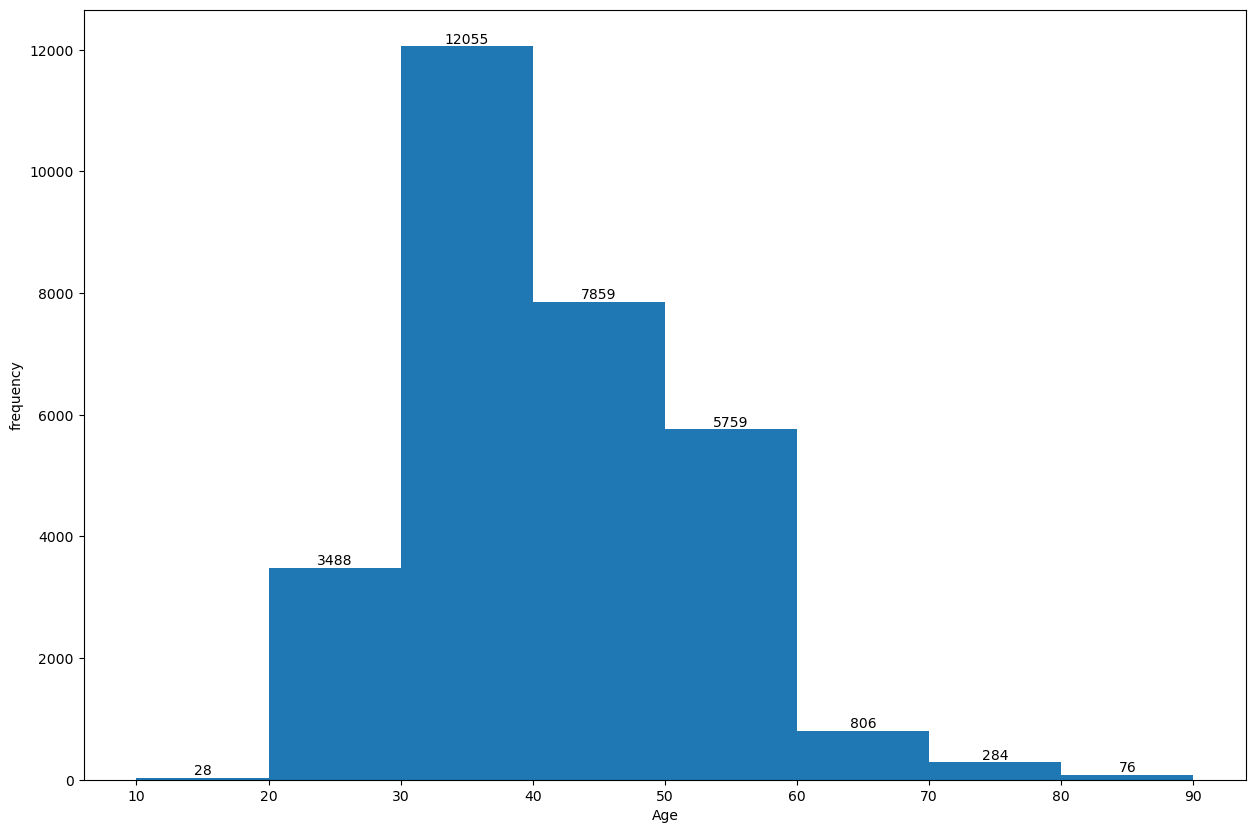

In [32]:
figure , ax = plt.subplots(figsize=(15,10))
hist = plt.hist(df['age'],bins=np.arange(10,100,10))
for hist in ax.containers:
    ax.bar_label(hist)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()    

Mst of clients of the bank are in age between 30 and 40 which is the normal age of prospering career
while students are the less

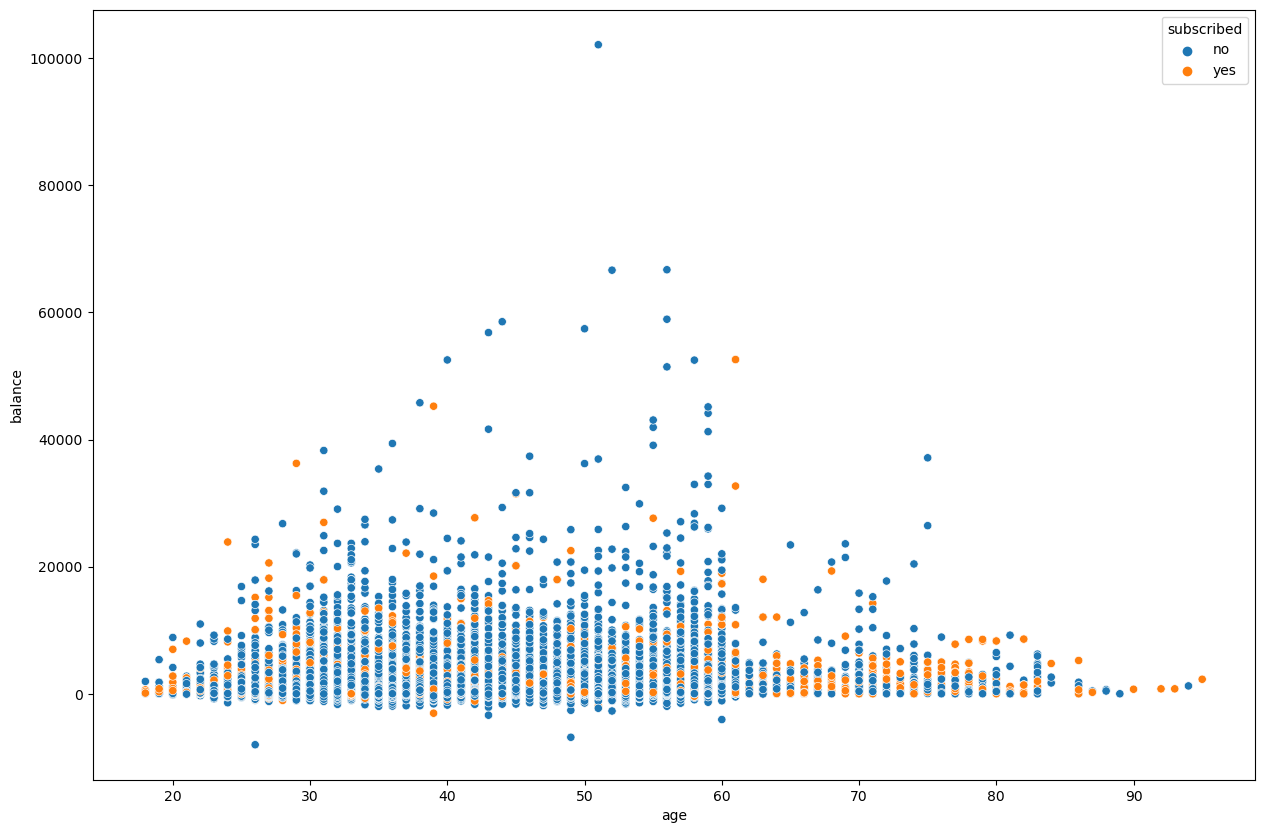

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['age'] ,y=df['balance'] , hue=df['subscribed'])
plt.show()

There is no linear clear relation between clients'age and balance so we can not make any implication more than that people over 60 has less balance which is logic as they start t retire

clients more than 60 start to subscribe in deposts of the bank as they intend to retire and there is no stable income for them and also the students who are at age 20 or less who need to pay fees of education so they subscribe

mature youth and men between30 and 60 do not intend to make depostis as they are able to work and build a career

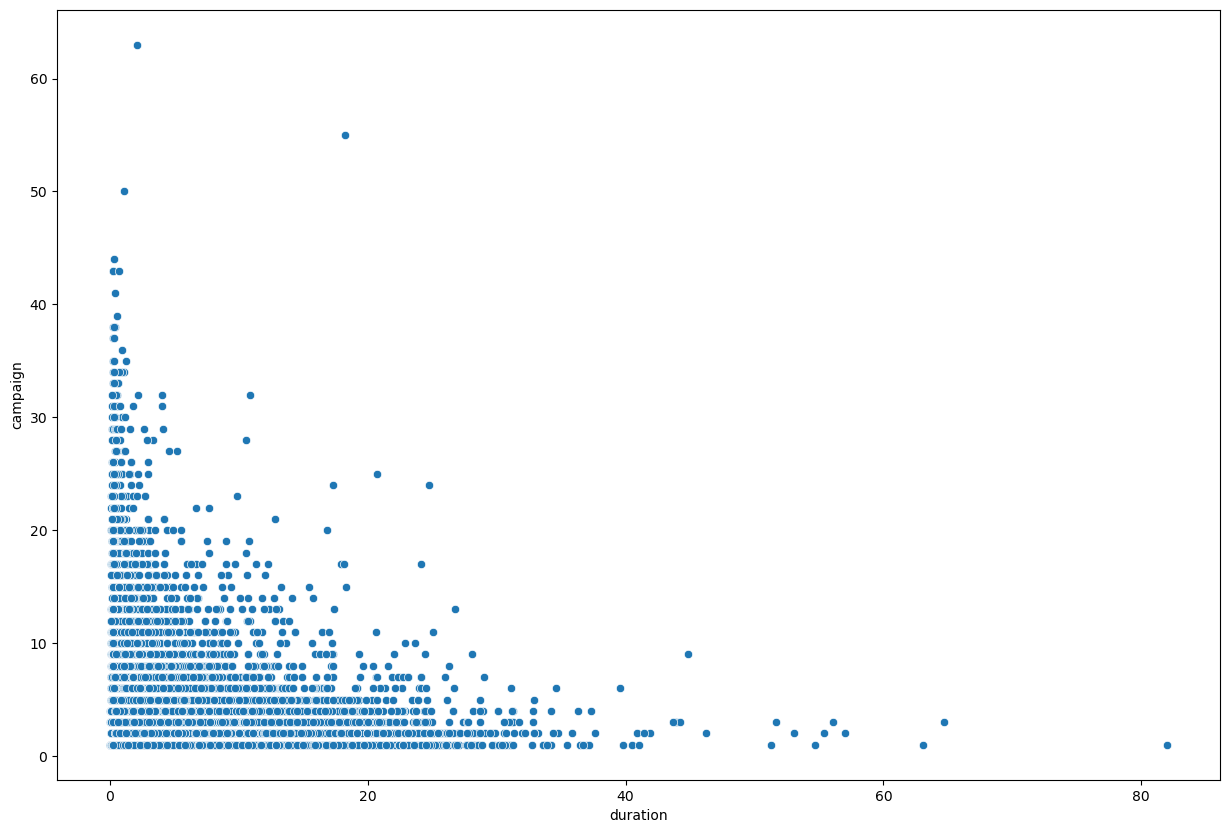

In [34]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['duration'] , y=df['campaign'])
plt.show()

the contact frequency between 5-10 call duration is more than any ther results

The more frequency of contact with the clients increases , the duration of call decreases

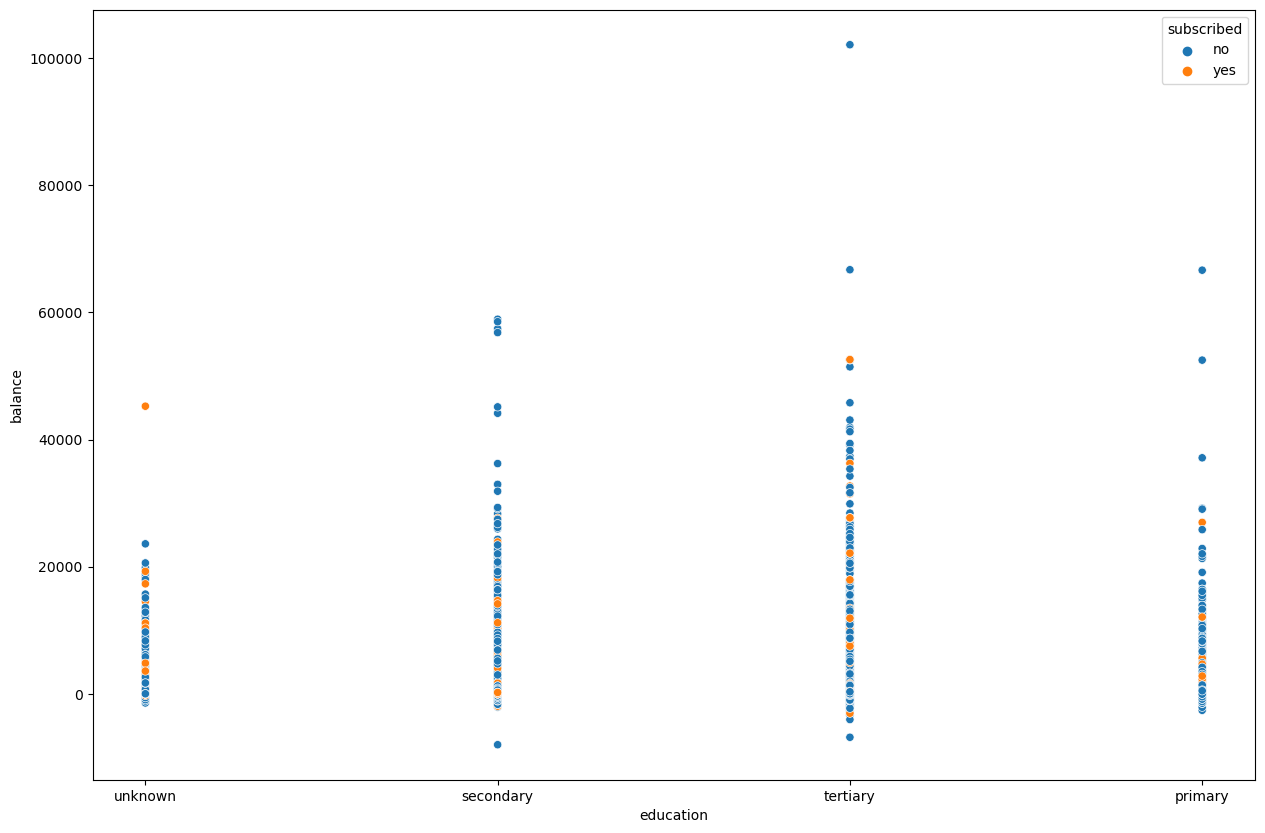

In [35]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['education'] ,y=df['balance'] , hue=df['subscribed'])
plt.show()

tertiary higher level of education have more balance that other results which indicates the importance of education in increasing income

lower educatin levels like primary who did nt get basic education have the least balance f incme and intend to make deposits

# Checking for outliers

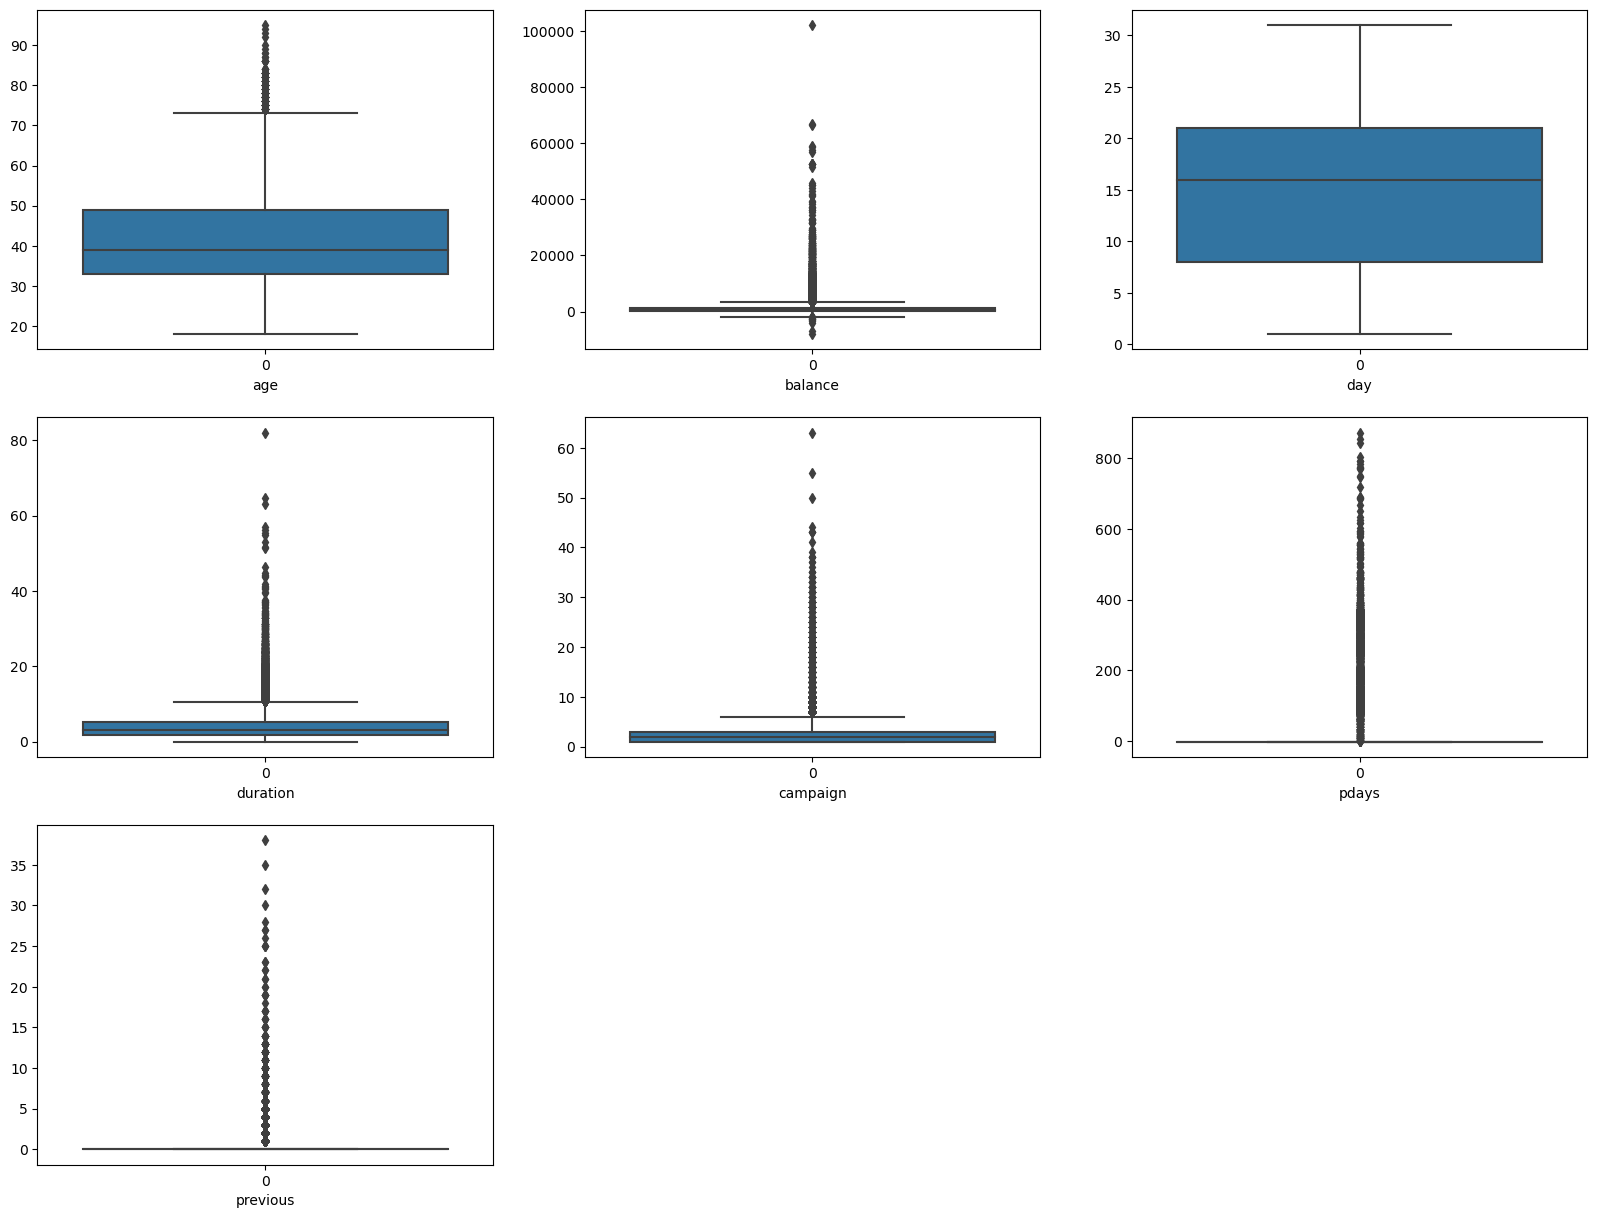

In [36]:
#visualize boxplot
plt.figure(figsize=(20,15))
plotnum=1
for i in numerical:
    if plotnum <=8 :
        ax = plt.subplot(3,3,plotnum)
        sns.boxplot(df[i])
        plt.xlabel(i ,fontsize=10)
    plotnum +=1
plt.show()    

all columns contains dicrete data except balance so we only remove outliers of balance

In [37]:
#use zscore method
from scipy.stats import zscore

In [38]:
outliers= df[['balance']]
z = np.abs(zscore(outliers))

In [39]:
filtering = (z<3).all(axis=1)
df1 = df[filtering]

In [40]:
print('old shape is',df.shape)
print('new shape is',df1.shape)
print('percentage of loss is ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

old shape is (30359, 17)
new shape is (29849, 17)
percentage of loss is  1.679897229816529


In [41]:
#use IQR method
outliers = ['balance']
#1st percentile
q1 = df[outliers].quantile(0.25)

#3rd percentile
q3 = df[outliers].quantile(0.75)

IQR = q3-q1
df2 = df[~((df <(q1 - 1.5*IQR)) | (df >(q3 + 1.5*IQR))).any(axis=1)]

In [42]:
print('old shape is',df.shape)
print('new shape is',df2.shape)
print('percentage of loss is ',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

old shape is (30359, 17)
new shape is (27173, 17)
percentage of loss is  10.494416812147962


IQR method is the best method to remove outliers

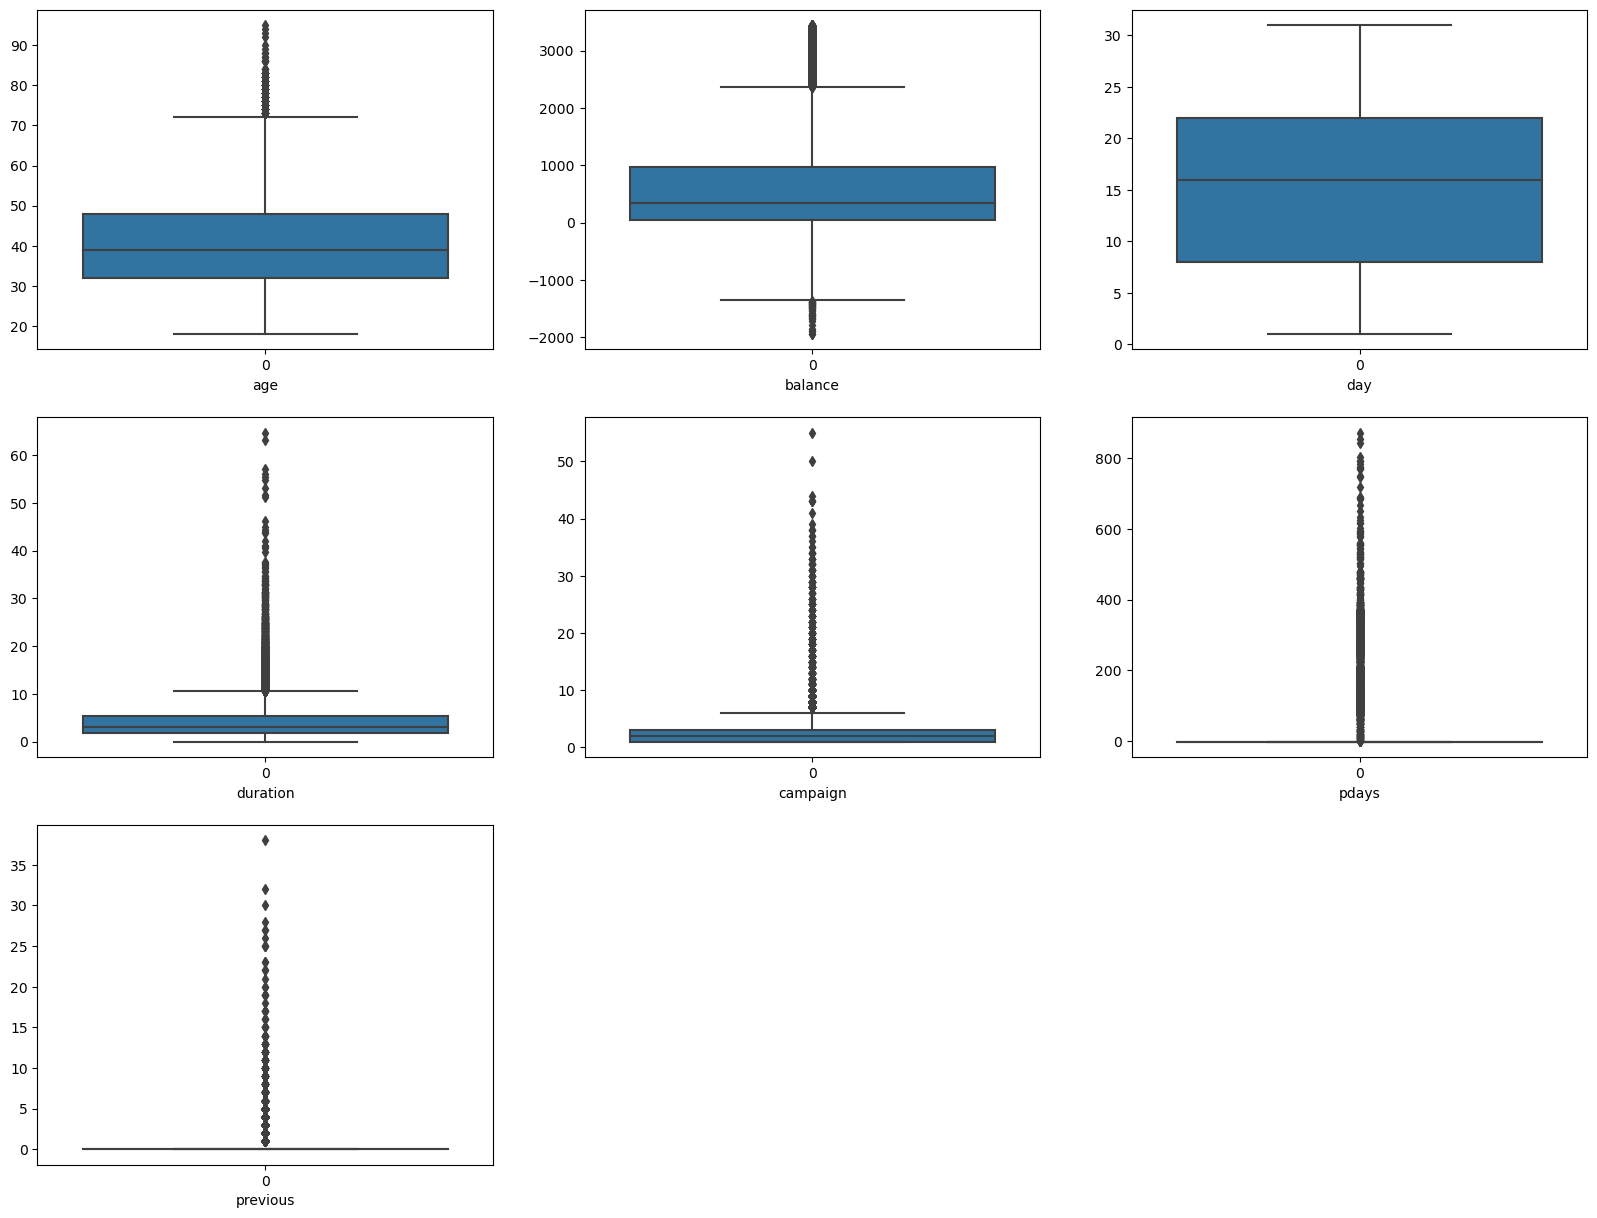

In [43]:
#now check the outliers
#visualize boxplot
plt.figure(figsize=(20,15))
plotnum=1
for i in numerical:
    if plotnum <=8 :
        ax = plt.subplot(3,3,plotnum)
        sns.boxplot(df2[i])
        plt.xlabel(i ,fontsize=10)
    plotnum +=1
plt.show()    

we reduced outliers as possible as we can and while the data is continuous data so we can ignore the remaing outliers and go one

# Checking Skewness

In [44]:
df2.skew()

age         0.661789
balance     1.297888
day         0.096132
duration    3.169428
campaign    4.754614
pdays       3.058087
previous    7.210118
dtype: float64

As we see above no need to improve skewness in columns campaign , pdays , previous as they contain dicrete data

we will reduce skewness of balance as it contain contiuus data

In [45]:
df2['balance'] = np.cbrt(df2['balance'])

In [46]:
df2.skew()

age         0.661789
balance    -0.849210
day         0.096132
duration    3.169428
campaign    4.754614
pdays       3.058087
previous    7.210118
dtype: float64

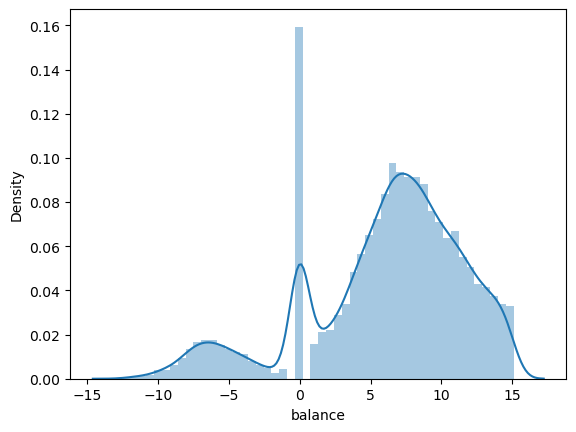

In [47]:
sns.distplot(df2['balance'])
plt.show()

we reduced skewness as possible 

# correlation

In [48]:
#prepare target variable by converting into numerical type
df2['subscribed'] = df2['subscribed'].replace({'no':0,'yes':1})

In [49]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,12.456918,no,no,telephone,19,nov,0.73,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,1.442250,no,no,cellular,20,jul,1.52,2,-1,0,unknown,0
2,27,services,married,secondary,no,9.622603,yes,no,cellular,18,jul,4.00,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,14.868480,no,no,cellular,22,jun,14.45,1,84,3,success,1
4,31,technician,married,secondary,no,4.918685,yes,no,cellular,4,feb,6.33,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0.000000,yes,no,cellular,12,may,1.93,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,no,7.243156,no,yes,cellular,5,jun,7.30,2,-1,0,unknown,1
31644,32,management,single,tertiary,no,6.782423,no,no,cellular,7,aug,0.62,3,-1,0,unknown,0
31645,57,technician,married,secondary,no,6.082202,yes,no,telephone,15,may,0.37,7,337,12,failure,0


In [50]:
df2['subscribed'].unique()

array([0, 1], dtype=int64)

In [51]:
df2.corr()

,age,balance,day,duration,campaign,pdays,previous,subscribed
age,1.000000,0.066147,-0.010735,-0.011940,0.007293,-0.008109,0.013158,0.014093
balance,0.066147,1.000000,-0.023069,0.032684,-0.043234,0.044166,0.056909,0.095975
day,-0.010735,-0.023069,1.000000,-0.038141,0.170362,-0.085643,-0.054856,-0.037524
duration,-0.011940,0.032684,-0.038141,1.000000,-0.076282,0.001970,0.001811,0.394544
campaign,0.007293,-0.043234,0.170362,-0.076282,1.000000,-0.094707,-0.054921,-0.069344
pdays,-0.008109,0.044166,-0.085643,0.001970,-0.094707,1.000000,0.582287,0.114997
previous,0.013158,0.056909,-0.054856,0.001811,-0.054921,0.582287,1.000000,0.129663
subscribed,0.014093,0.095975,-0.037524,0.394544,-0.069344,0.114997,0.129663,1.000000


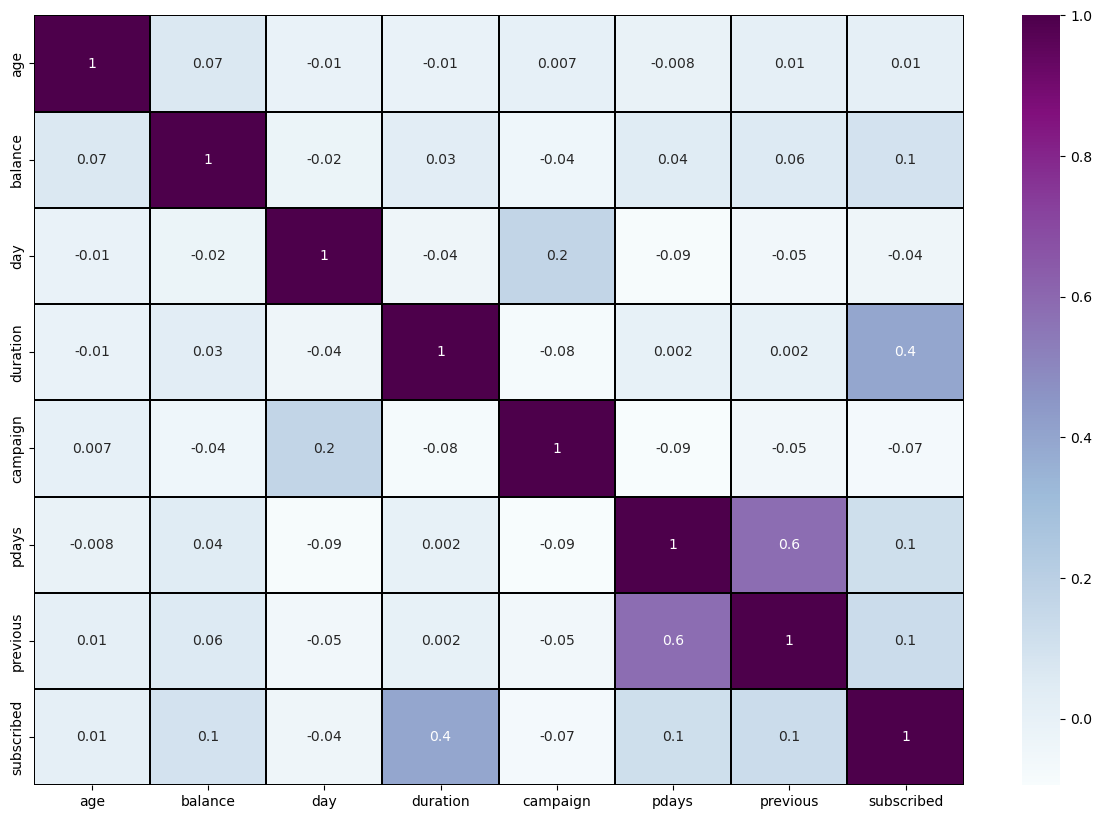

In [52]:
#visualize heatmap between independant variables and target label
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot= True , linewidth=0.1 ,cmap='BuPu' , linecolor='black', fmt='0.1g')
plt.show()

There is a strong positive relation between previous and pdays variables

target label subscribed has a strong positive relation with duration when means it is highly influenced by the duration of subscribing in bank

# Transform all categorical columns into numerical columns

In [53]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [54]:
df2['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [55]:
df2['job'] = df2['job'].replace({'admin.':1 , 'unknown':2 ,'services':3 , 'management':4 ,
                               'technician':5 , 'retired':6 ,'blue-collar':7 ,'housemaid':8,
                             'self-employed':9, 'student':10 , 'entrepreneur':11 ,'unemployed':12 })

In [60]:
df2['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [61]:
df2['marital'] = df2['marital'].replace({'married':1 , 'divorced':2 , 'single':3})

In [64]:
df2['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [65]:
df2['education'] = df2['education'].replace({'unknown':1 ,'primary':2 ,'secondary':3 ,'tertiary':4})

In [68]:
df2['default'].unique()

array(['no', 'yes'], dtype=object)

In [70]:
df2['default']= df2['default'].replace({'no':0 , 'yes':1})

In [72]:
df2['housing'].unique()

array(['no', 'yes'], dtype=object)

In [73]:
df2['housing']= df2['housing'].replace({'no':0 , 'yes':1})

In [75]:
df2['loan'].unique()

array(['no', 'yes'], dtype=object)

In [76]:
df2['loan']= df2['loan'].replace({'no':0 , 'yes':1})

In [79]:
df2['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [80]:
df2['contact'] = df2['contact'].replace({'telephone':1 ,'cellular':2,'unknown':3})

In [82]:
df2['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [83]:
df2['month'] = df2['month'].replace({'jan':1 ,'feb':2 , 'mar':3 ,'apr':4 , 'may':5 , 'jun':6
                                    ,'jul':7 ,'aug':8  ,'sep':9 , 'oct':10 , 'nov':11 ,'dec':12})

In [85]:
df2['poutcome'].unique()

array(['unknown', 'success', 'failure'], dtype=object)

In [86]:
df2['poutcome'] = df2['poutcome'].replace({'success':1 ,'failure':2 ,'unknown':3 })

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27173 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         27173 non-null  int64  
 1   job         27173 non-null  int64  
 2   marital     27173 non-null  int64  
 3   education   27173 non-null  int64  
 4   default     27173 non-null  int64  
 5   balance     27173 non-null  float64
 6   housing     27173 non-null  int64  
 7   loan        27173 non-null  int64  
 8   contact     27173 non-null  int64  
 9   day         27173 non-null  int64  
 10  month       27173 non-null  int64  
 11  duration    27173 non-null  float64
 12  campaign    27173 non-null  int64  
 13  pdays       27173 non-null  int64  
 14  previous    27173 non-null  int64  
 15  poutcome    27173 non-null  int64  
 16  subscribed  27173 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 4.7 MB


In [89]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,1,1,1,0,12.456918,0,0,1,19,11,0.73,2,-1,0,3,0
1,31,2,1,3,0,1.442250,0,0,2,20,7,1.52,2,-1,0,3,0
2,27,3,1,3,0,9.622603,1,0,2,18,7,4.00,1,-1,0,3,0
3,57,4,2,4,0,14.868480,0,0,2,22,6,14.45,1,84,3,1,1
4,31,5,1,3,0,4.918685,1,0,2,4,2,6.33,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,3,4,0,0.000000,1,0,2,12,5,1.93,2,-1,0,3,0
31643,53,4,2,4,0,7.243156,0,1,2,5,6,7.30,2,-1,0,3,1
31644,32,4,3,4,0,6.782423,0,0,2,7,8,0.62,3,-1,0,3,0
31645,57,5,1,3,0,6.082202,1,0,1,15,5,0.37,7,337,12,2,0


# Scaling Features

In [90]:
x1 = df2.drop('subscribed', axis=1)
y1 = df2['subscribed']

In [91]:
print('shape of independant variables is ',x1.shape)
print('shape of target label is ',y1.shape)

shape of independant variables is  (27173, 16)
shape of target label is  (27173,)


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [94]:
x_scaled = pd.DataFrame( data=scaler.fit_transform(x1), columns = x1.columns)
x_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.468011,-1.615360,-0.766541,-2.649693,-0.145324,1.160200,-1.128921,-0.455317,-2.246946,0.374475,2.118026,-0.833388,-0.248799,-0.359390,-0.281597,0.383363
1,-0.928146,-1.241996,-0.766541,-0.062042,-0.145324,-0.850524,-1.128921,-0.455317,-0.442416,0.493668,0.389847,-0.647225,-0.248799,-0.359390,-0.281597,0.383363
2,-1.311531,-0.868632,-0.766541,-0.062042,-0.145324,0.642797,0.885802,-0.455317,-0.442416,0.255282,0.389847,-0.062814,-0.564923,-0.359390,-0.281597,0.383363
3,1.563857,-0.495268,0.366220,1.231784,-0.145324,1.600430,-1.128921,-0.455317,-0.442416,0.732054,-0.042198,2.399724,-0.564923,0.578242,1.740204,-3.952592
4,-0.928146,-0.121904,-0.766541,-0.062042,-0.145324,-0.215902,0.885802,-0.455317,-0.442416,-1.413418,-1.770377,0.486250,-0.564923,-0.359390,-0.281597,0.383363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27168,-1.119839,-0.495268,1.498982,1.231784,-0.145324,-1.113807,0.885802,-0.455317,-0.442416,-0.459875,-0.474243,-0.550608,-0.248799,-0.359390,-0.281597,0.383363
27169,1.180472,-0.495268,0.366220,1.231784,-0.145324,0.208430,-1.128921,2.196274,-0.442416,-1.294225,-0.042198,0.714830,-0.248799,-0.359390,-0.281597,0.383363
27170,-0.832300,-0.495268,1.498982,1.231784,-0.145324,0.124323,-1.128921,-0.455317,-0.442416,-1.055839,0.821891,-0.859309,0.067325,-0.359390,-0.281597,0.383363
27171,1.563857,-0.121904,-0.766541,-0.062042,-0.145324,-0.003502,0.885802,-0.455317,-2.246946,-0.102296,-0.474243,-0.918222,1.331820,3.369078,7.805607,-1.784614


# Check Variance Inflation Factor

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x1.columns))]
vif['Column'] = x1.columns
vif

,VIF,Column
0,1.244331,age
1,1.029820,job
2,1.188852,marital
3,1.081150,education
4,1.054771,default
5,1.084258,balance
6,1.157713,housing
7,1.026748,loan
8,1.157244,contact
9,1.045280,day


As we see above there is no multicollineraity problem with any features so our data is good

# OverSampling

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [98]:
x , y = sm.fit_resample(x_scaled , y1)

In [99]:
print('old shape of features is ',x1.shape,' old shape of target label is ',y1.shape)
print('balanced shape of features is ',x.shape,' balanced shape of target label is ',y.shape)

old shape of features is  (27173, 16)  old shape of target label is  (27173,)
balanced shape of features is  (48358, 16)  balanced shape of target label is  (48358,)


# Building the model

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve

In [102]:
lr = LogisticRegression()
accuracy = []
stats = []
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=i)
    lr.fit(x_train,y_train)
    y_pred= lr.predict(x_test)
    accu = accuracy_score(y_test , y_pred)
    accuracy.append(accu)
    stats.append(i)

In [103]:
random = pd.DataFrame()
random['accuracy']= accuracy
random['number of stats'] = stats
random[random['accuracy'] == random['accuracy'].max()]

,accuracy,number of stats
60,0.828853,61


Best accuracy is 82.88 when number of stats is 61

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=61)

In [105]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [106]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}

for name , m in models.items():
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    print('mdel name is ',name)
    print('accuracy score of test data is ','{:.2f}'.format(accuracy_score(y_test,y_pred)))
    print('accuracy score of train data is ','{:.2f}'.format(accuracy_score(y_train,m.predict(x_train))))
    print('\n')
    print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
    print('classification report is\n',classification_report(y_test,y_pred))

mdel name is  LogisticRegressin
accuracy score of test data is  0.83
accuracy score of train data is  0.82


confusion matrix is 
 [[6121 1132]
 [1351 5904]]
classification report is
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      7253
           1       0.84      0.81      0.83      7255

    accuracy                           0.83     14508
   macro avg       0.83      0.83      0.83     14508
weighted avg       0.83      0.83      0.83     14508

mdel name is  RandomForestClassifier
accuracy score of test data is  0.95
accuracy score of train data is  1.00


confusion matrix is 
 [[6793  460]
 [ 206 7049]]
classification report is
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      7253
           1       0.94      0.97      0.95      7255

    accuracy                           0.95     14508
   macro avg       0.95      0.95      0.95     14508
weighted avg       0.95     

ExtraTreesClassifier has the best accuracy 96%

# Cross validation Score

In [107]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}

for name , m in models.items():
    print('model name is ',name)
    score = cross_val_score(m ,x,y,cv=5)
    print('score is ',score)
    print('mean is ',score.mean())
    print('Difference between accuracy score and score mean is ',accuracy_score(y_test,m.predict(x_test)) - score.mean())
    print('\n')

model name is  LogisticRegressin
score is  [0.8195823  0.82919768 0.81865178 0.82659497 0.81263572]
mean is  0.8213324902954857
Difference between accuracy score and score mean is  0.007520556299496328


model name is  RandomForestClassifier
score is  [0.9103598  0.96350289 0.96060794 0.96391273 0.95967325]
mean is  0.9516113231178391
Difference between accuracy score and score mean is  0.0024829696861310424


model name is  SVC
score is  [0.87189826 0.88502895 0.87820513 0.88574087 0.88077758]
mean is  0.8803301596041614
Difference between accuracy score and score mean is  0.0026309652924473292


model name is  GradientBoostingClassifier
score is  [0.85101323 0.93703474 0.9327957  0.93899287 0.9299969 ]
mean is  0.9179666871332343
Difference between accuracy score and score mean is  0.006557713197617665


model name is  BaggingClassifier
score is  [0.87437965 0.9528536  0.95543838 0.95512357 0.94922966]
mean is  0.9374049700831465
Difference between accuracy score and score mean is  0

KNeighborsClassifier Model has the least difference so it is the best model to use

# Hyperparameter

In [115]:
knn = KNeighborsClassifier( n_neighbors=3 , leaf_size=5)
knn.fit(x_train , y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=3)

In [119]:
y_pred = knn.predict(x_test)
print('accuracy score of test data is ','{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('accuracy score of train data is ','{:.2f}'.format(accuracy_score(y_train,knn.predict(x_train))))
print('\n')
print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
print('classification report is\n',classification_report(y_test,y_pred))

accuracy score of test data is  0.93
accuracy score of train data is  0.96


confusion matrix is 
 [[6290  963]
 [  38 7217]]
classification report is
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      7253
           1       0.88      0.99      0.94      7255

    accuracy                           0.93     14508
   macro avg       0.94      0.93      0.93     14508
weighted avg       0.94      0.93      0.93     14508



we increased accuracy of test model from 92% to 93%

In [120]:
from sklearn.metrics import roc_auc_score , auc

In [121]:
fpr , tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr and tpr is ',roc_auc_score(y_test , y_pred))
print('\n')
print('thresold is ',thresold)
print('false positive rate is ',fpr)
print('true positive rate is ',tpr)

accuracy score of fpr and tpr is  0.9309947935705305


thresold is  [2 1 0]
false positive rate is  [0.         0.13277265 1.        ]
true positive rate is  [0.         0.99476223 1.        ]


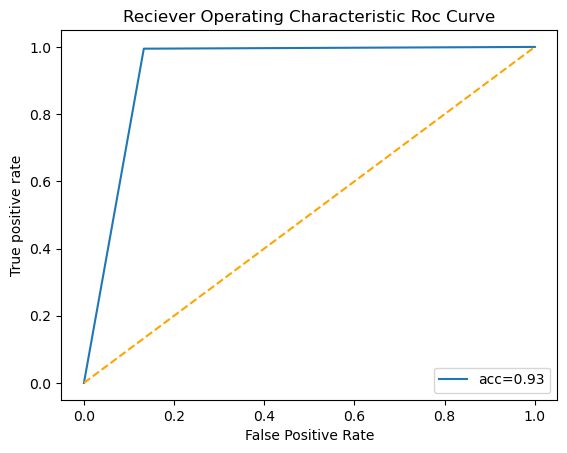

In [125]:
accuracy_score = roc_auc_score(y_test , y_pred)
plt.plot(fpr,tpr , label = 'acc={:.2f}'.format(accuracy_score))
plt.plot([0,1],[0,1] , color= 'orange' , linestyle='--')
plt.title('Reciever Operating Characteristic Roc Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [126]:
pred = pd.DataFrame()
pred['actual'] = y_test
pred['predicted'] = y_pred
pred

,actual,predicted
28172,1,1
8630,0,0
30393,1,1
42194,1,1
32089,1,1
...,...,...
31124,1,1
33436,1,1
12837,0,0
3109,1,1


# Predict the test dataset

In [164]:
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [165]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [167]:
test['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [168]:
# in column poutcome we see values like other which doesn't make any sense or giving any information so we will delete it
ind = np.where(test['poutcome'] == 'other')
test.drop(test.index[ind] ,axis =0 , inplace= True)

In [169]:
test['poutcome'].unique()

array(['unknown', 'failure', 'success'], dtype=object)

In [170]:
test['job'].unique()

array(['services', 'retired', 'self-employed', 'blue-collar',
       'management', 'technician', 'admin.', 'unemployed', 'housemaid',
       'entrepreneur', 'student', 'unknown'], dtype=object)

In [171]:
test['job'] = test['job'].replace({'admin.':1 , 'unknown':2 ,'services':3 , 'management':4 ,
                               'technician':5 , 'retired':6 ,'blue-collar':7 ,'housemaid':8,
                             'self-employed':9, 'student':10 , 'entrepreneur':11 ,'unemployed':12 })

In [172]:
test['marital'] = test['marital'].replace({'married':1 , 'divorced':2 , 'single':3})
test['education'] = test['education'].replace({'unknown':1 ,'primary':2 ,'secondary':3 ,'tertiary':4})
test['default']= test['default'].replace({'no':0 , 'yes':1})
test['housing']= test['housing'].replace({'no':0 , 'yes':1})
test['loan']= test['loan'].replace({'no':0 , 'yes':1})
test['contact'] = test['contact'].replace({'telephone':1 ,'cellular':2,'unknown':3})

test['month'] = test['month'].replace({'jan':1 ,'feb':2 , 'mar':3 ,'apr':4 , 'may':5 , 'jun':6
                                    ,'jul':7 ,'aug':8  ,'sep':9 , 'oct':10 , 'nov':11 ,'dec':12})

test['poutcome'] = test['poutcome'].replace({'success':1 ,'failure':2 ,'unknown':3 })

In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         13012 non-null  int64
 1   age        13012 non-null  int64
 2   job        13012 non-null  int64
 3   marital    13012 non-null  int64
 4   education  13012 non-null  int64
 5   default    13012 non-null  int64
 6   balance    13012 non-null  int64
 7   housing    13012 non-null  int64
 8   loan       13012 non-null  int64
 9   contact    13012 non-null  int64
 10  day        13012 non-null  int64
 11  month      13012 non-null  int64
 12  duration   13012 non-null  int64
 13  campaign   13012 non-null  int64
 14  pdays      13012 non-null  int64
 15  previous   13012 non-null  int64
 16  poutcome   13012 non-null  int64
dtypes: int64(17)
memory usage: 1.8 MB


In [174]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,3,1,3,0,118,1,0,2,15,5,20,6,-1,0,3
1,40403,78,6,2,2,0,2787,0,0,1,1,7,372,1,-1,0,3
2,3709,31,9,3,4,0,144,1,0,3,16,5,676,1,-1,0,3
3,37422,57,3,3,2,0,3777,1,0,1,13,5,65,2,-1,0,3
4,12527,45,7,2,3,0,-705,0,1,3,3,7,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,4,0,45,0,0,2,28,8,148,4,-1,0,3
13560,11743,54,7,1,2,0,2281,1,0,3,20,6,158,1,-1,0,3
13561,28292,35,6,1,2,0,285,1,0,2,29,1,136,1,-1,0,3
13562,45163,29,1,3,3,0,464,0,0,2,9,11,208,2,91,3,1


Now test data is ready tp be predicted

In [175]:
test_copy = test.drop('ID' ,axis=1)
test_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,3,1,3,0,118,1,0,2,15,5,20,6,-1,0,3
1,78,6,2,2,0,2787,0,0,1,1,7,372,1,-1,0,3
2,31,9,3,4,0,144,1,0,3,16,5,676,1,-1,0,3
3,57,3,3,2,0,3777,1,0,1,13,5,65,2,-1,0,3
4,45,7,2,3,0,-705,0,1,3,3,7,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,4,0,45,0,0,2,28,8,148,4,-1,0,3
13560,54,7,1,2,0,2281,1,0,3,20,6,158,1,-1,0,3
13561,35,6,1,2,0,285,1,0,2,29,1,136,1,-1,0,3
13562,29,1,3,3,0,464,0,0,2,9,11,208,2,91,3,1


In [176]:
test_copy.shape

(13012, 16)

In [182]:
prediction = pd.DataFrame()


prediction['ID'] = test['ID']
prediction['Predicted Subscribtion']= knn.predict(scaler.transform(test_copy))
prediction

,ID,Predicted Subscribtion
0,38441,1
1,40403,1
2,3709,1
3,37422,1
4,12527,1
...,...,...
13559,23465,1
13560,11743,1
13561,28292,1
13562,45163,1


In [184]:
prediction['Predicted Subscribtion'].unique()

array([1, 0], dtype=int64)

In [186]:
prediction['Predicted Subscribtion'] = prediction['Predicted Subscribtion'].replace({1:'yes' ,0:'no'})
prediction

,ID,Predicted Subscribtion
0,38441,yes
1,40403,yes
2,3709,yes
3,37422,yes
4,12527,yes
...,...,...
13559,23465,yes
13560,11743,yes
13561,28292,yes
13562,45163,yes
